In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
from category_encoders import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, classification_report

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

plt.style.use('seaborn-v0_8-darkgrid')

In [2]:
pip install numpy pandas matplotlib seaborn category_encoders scikit-learn


  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/75/5b/ca6c8bd14007e5ca171c7c03102d17b4f4e0ceb53957e8c44343a9546dcc/numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata
  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/19/4e/6a7f400d4b65f82e37eefa7dbbe3e6f0a4fa542ca7ebb68c787eeebdc497/pandas-2.2.1-cp312-cp312-macosx_11_0_arm64.whl.metadata
  Using cached pandas-2.2.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (19 kB)
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/da/2b/2bb6073ca8d336da07ace7d98bf7bb9da8233f55876bb3db6a5ee924f3e9/matplotlib-3.8.4-cp312-cp312-macosx_11_0_arm64.whl.metadata
  Using cached matplotlib-3.8.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25

In [4]:
df = pd.read_csv('./train.csv')
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
df.shape

(20758, 18)

In [6]:
df.dtypes

id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [10]:
# Stat of numerical values
df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [60]:
# Checking number of null values
df.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [17]:
# Total duplicate rows
df.duplicated().sum()

0

In [16]:
# Print duplicated entries
df[df.duplicated]

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


In [15]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [14]:
# Making lists of numerical and categorical columns
numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in df.columns if df[cname].dtype == "object"]

# Printing numerical and categorical column lists
print('Numerical Columns: ', numerical_cols)
print('Categorical Columns: ', categorical_cols)

Numerical Columns:  ['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical Columns:  ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


In [13]:
# Calculate number of unique values and unique values for each categorical features
unique_counts = df[categorical_cols].nunique()
unique_values = df[categorical_cols].apply(lambda x: x.unique())

# Create new dataframe with the results
pd.DataFrame({'Number of Unique Values': unique_counts, 'Unique Values': unique_values})

,Number of Unique Values,Unique Values
Gender,2,"[Male, Female]"
family_history_with_overweight,2,"[yes, no]"
FAVC,2,"[yes, no]"
CAEC,4,"[Sometimes, Frequently, no, Always]"
SMOKE,2,"[no, yes]"
SCC,2,"[no, yes]"
CALC,3,"[Sometimes, no, Frequently]"
MTRANS,5,"[Public_Transportation, Automobile, Walking, M..."
NObeyesdad,7,"[Overweight_Level_II, Normal_Weight, Insuffici..."


In [12]:
# Value counts for each NObeyesdad types
NObeyesdadVC = df.NObeyesdad.value_counts()
NObeyesdadVC

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

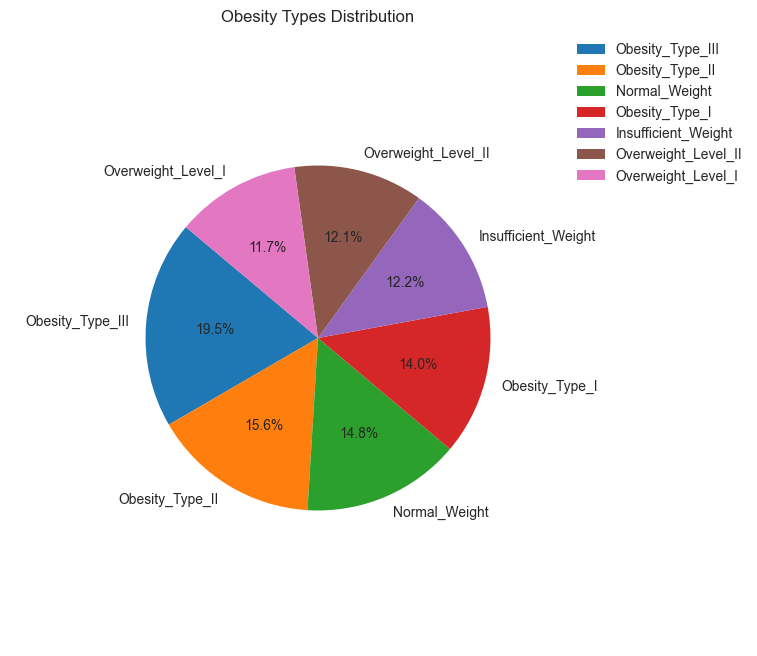

In [18]:
# Storing labels and sizes into variables
labels = NObeyesdadVC.index.tolist()
sizes = NObeyesdadVC.values.tolist()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, radius=0.7)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(0.9, 1))

# Set title
plt.title('Obesity Types Distribution')

# Show plot
plt.show()

# Preprocessing

In [23]:
df["family_history_with_overweight"] = df["family_history_with_overweight"].map({"yes": 1, "no": 0})
df["FAVC"] = df["FAVC"].map({"yes": 1, "no": 0})
df["SMOKE"] = df["SMOKE"].map({"yes": 1, "no": 0})
df["SCC"] = df["SCC"].map({"yes": 1, "no": 0})

In [24]:
# Get dummies for two columns
df_encoded = pd.get_dummies(df[['MTRANS', 'Gender']], drop_first=True)

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df, df_encoded], axis=1)

df.drop(columns=['MTRANS', 'Gender'], inplace=True)

KeyError: "None of [Index(['MTRANS', 'Gender'], dtype='object')] are in the [columns]"

In [70]:
df.head()

,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Male
0,0,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,...,0,0.000000,0.976473,Sometimes,Overweight_Level_II,False,False,True,False,True
1,1,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,...,0,1.000000,1.000000,no,Normal_Weight,False,False,False,False,False
2,2,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,...,0,0.866045,1.673584,no,Insufficient_Weight,False,False,True,False,False
3,3,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,...,0,1.467863,0.780199,Sometimes,Obesity_Type_III,False,False,True,False,False
4,4,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,...,0,1.967973,0.931721,Sometimes,Overweight_Level_II,False,False,True,False,True


In [25]:
X = df.drop(columns='NObeyesdad')
y = df['NObeyesdad']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (16606, 20)
X_test shape (4152, 20)
y_train shape (16606,)
y_test shape (4152,)


In [28]:
# Define the encoding order
encoding_order = ['no', 'Sometimes', 'Frequently', 'Always']

# Instance of Ordinal Encoder
ordinal_encoder = OrdinalEncoder(categories=[encoding_order] * 2)

# Apply ordinal encoding to the selected columns
X_train[['CALC', 'CAEC']] = ordinal_encoder.fit_transform(X_train[['CALC', 'CAEC']])
X_test[['CALC', 'CAEC']] = ordinal_encoder.transform(X_test[['CALC', 'CAEC']])

X_train.head()

,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Male
9958,9958,17.000000,1.770000,97.000000,NaN,NaN,3.0,3.000000,3.0,NaN,2.000000,NaN,3.000000,1.0,0.0,False,False,False,False,True
7841,7841,22.667596,1.753389,54.877111,NaN,NaN,2.0,4.000000,1.0,NaN,2.000000,NaN,2.000000,1.0,0.0,False,False,True,False,True
9293,9293,21.838323,1.819867,122.024954,NaN,NaN,3.0,2.880817,1.0,NaN,1.645338,NaN,0.739881,0.0,1.0,False,False,True,False,True
15209,15209,41.000000,1.580000,80.000000,NaN,NaN,2.0,3.000000,1.0,NaN,1.000000,NaN,0.000000,0.0,1.0,False,False,False,False,False
16515,16515,23.000000,1.800000,95.000000,NaN,NaN,3.0,3.000000,1.0,NaN,3.000000,NaN,2.000000,1.0,2.0,False,False,True,False,True


In [29]:
original_labels = y_test.value_counts()

In [30]:
original_labels

NObeyesdad
Obesity_Type_III       804
Obesity_Type_II        657
Normal_Weight          626
Obesity_Type_I         543
Insufficient_Weight    524
Overweight_Level_II    514
Overweight_Level_I     484
Name: count, dtype: int64

In [31]:
# Instance of Ordinal Encoder
le = LabelEncoder()

# Fit our train data and tranform train and test data
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [32]:
# Function for evalution report and plotting confusion matrix
def make_evaluation(y_true, y_pred, title):
    """
    Plot the confusion matrix.

    Parameters:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
        title (str): Title for the plot.

    Returns:
        None
    """
    target_names = ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']

    # Display classification report
    print(classification_report(y_true, y_pred, target_names=target_names))

    fig, ax = plt.subplots(figsize=(10, 5))
    disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, ax=ax)
    ax.xaxis.set_ticklabels(target_names, rotation=90)  # Rotate x-axis labels by 45 degree
    
    ax.yaxis.set_ticklabels(target_names)
    ax.grid(False)  # Remove grid lines
    _ = ax.set_title(title)
    plt.show()

# Random Forest

                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.93      0.93       524
      Normal_Weight       0.84      0.88      0.86       626
     Obesity_Type_I       0.89      0.86      0.87       543
    Obesity_Type_II       0.97      0.98      0.97       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.76      0.72      0.74       484
Overweight_Level_II       0.76      0.78      0.77       514

           accuracy                           0.89      4152
          macro avg       0.88      0.88      0.88      4152
       weighted avg       0.89      0.89      0.89      4152



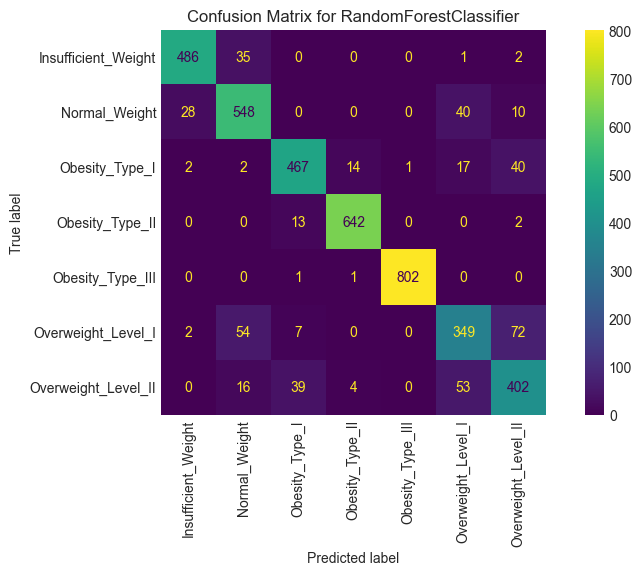

In [35]:
# Initialize and train the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf_clf.predict(X_test)

rf_y_pred

# Display Evaluation
make_evaluation(y_test, rf_y_pred, title=f"Confusion Matrix for {rf_clf.__class__.__name__}")

In [34]:
# Set of hyperparameters to search
n_estimators = [int(x) for x in np.linspace(start=100, stop=2000, num = 10)]
max_features = ['sqrt', 'log2', None]
max_depth = [int(x) for x in np.linspace(start=10, stop=1000, num = 10)]
min_samples_split = [2,5,10,14]
min_samples_leaf = [1,2,4,6,8]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'criterion': ['gini', 'entropy', 'log_loss']
}

# Print the set
random_grid

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000],
 'max_features': ['sqrt', 'log2', None],
 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
 'min_samples_split': [2, 5, 10, 14],
 'min_samples_leaf': [1, 2, 4, 6, 8],
 'criterion': ['gini', 'entropy', 'log_loss']}

In [36]:
# Initialize Random Forest classifier
rf = RandomForestClassifier()

# Initialize RandomizedSearchCV
rf_randomSearchCV = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=5, verbose=False, random_state=42, n_jobs=None,error_score='raise')

# Fit RandomizedSearchCV to the training data
rf_randomCV= rf_randomSearchCV.fit(X_train, y_train)

In [38]:
print("Best parameters found by RandomizedSearchCV:")
print(rf_randomCV.best_params_)

print("Best score found by RandomizedSearchCV:")
print(rf_randomCV.best_score_)

Best parameters found by RandomizedSearchCV:
{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 120, 'criterion': 'gini'}
Best score found by RandomizedSearchCV:
0.8917263954899232


In [98]:
X_testing = pd.read_csv('test.csv')
X_testing

                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.91      0.92       524
      Normal_Weight       0.82      0.88      0.85       626
     Obesity_Type_I       0.90      0.87      0.88       543
    Obesity_Type_II       0.97      0.97      0.97       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.76      0.72      0.74       484
Overweight_Level_II       0.77      0.79      0.78       514

           accuracy                           0.89      4152
          macro avg       0.88      0.88      0.88      4152
       weighted avg       0.89      0.89      0.89      4152



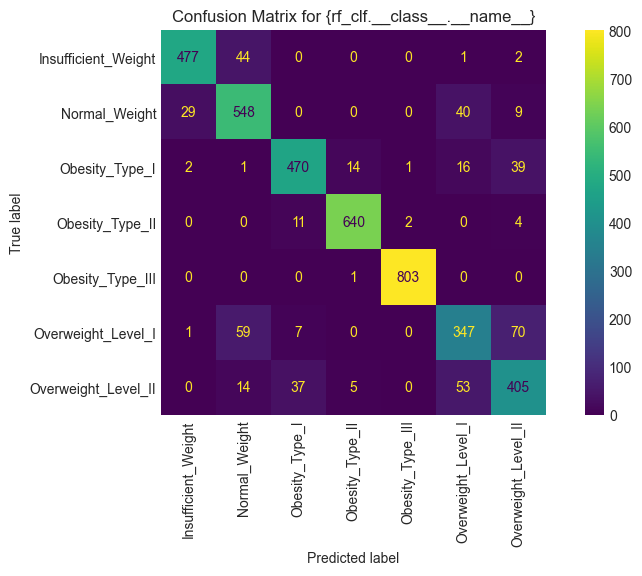

In [39]:
# Initialize and train the Random Forest classifier
rf_clf = RandomForestClassifier(**rf_randomCV.best_params_)
rf_clf.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf_clf.predict(X_test)

# Display Evaluation
make_evaluation(y_test, rf_y_pred, title="Confusion Matrix for {rf_clf.__class__.__name__}")

In [40]:
print('Accuracy of RandomForest', accuracy_score(y_test, rf_y_pred))
print('F1_score of RandomForest', f1_score(y_test, rf_y_pred, average='weighted'))
print('Precision_score of RandomForest', precision_score(y_test, rf_y_pred, average='weighted'))
print('Recall_score of RandomForest', recall_score(y_test, rf_y_pred, average='weighted'))

Accuracy of RandomForest 0.888728323699422
F1_score of RandomForest 0.8886219514382961
Precision_score of RandomForest 0.8890592154782214
Recall_score of RandomForest 0.888728323699422


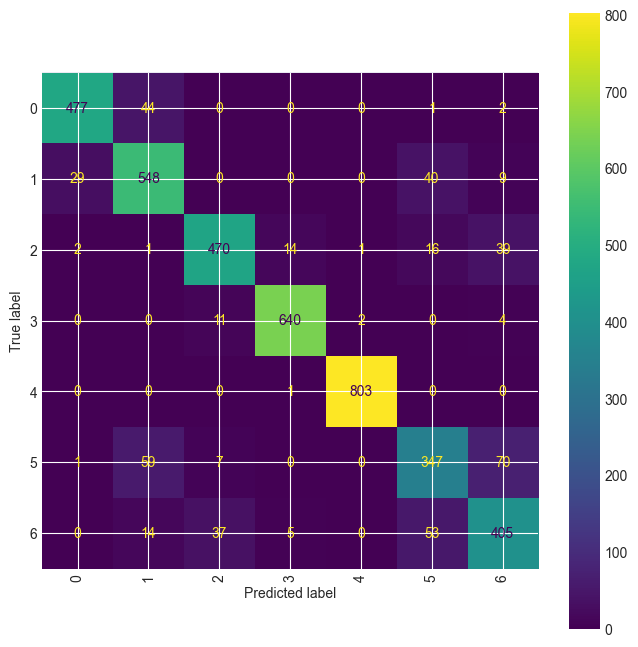

In [41]:
fig , ax  = plt.subplots(figsize = (8,8))
# Plot confusion matrix from predictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=rf_y_pred,ax=ax);
plt.xticks(rotation=90);

Fitting 5 folds for each of 50 candidates, totalling 250 fits
                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.94      0.94       524
      Normal_Weight       0.87      0.89      0.88       626
     Obesity_Type_I       0.89      0.88      0.88       543
    Obesity_Type_II       0.98      0.97      0.98       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.77      0.77      0.77       484
Overweight_Level_II       0.79      0.80      0.80       514

           accuracy                           0.90      4152
          macro avg       0.89      0.89      0.89      4152
       weighted avg       0.90      0.90      0.90      4152



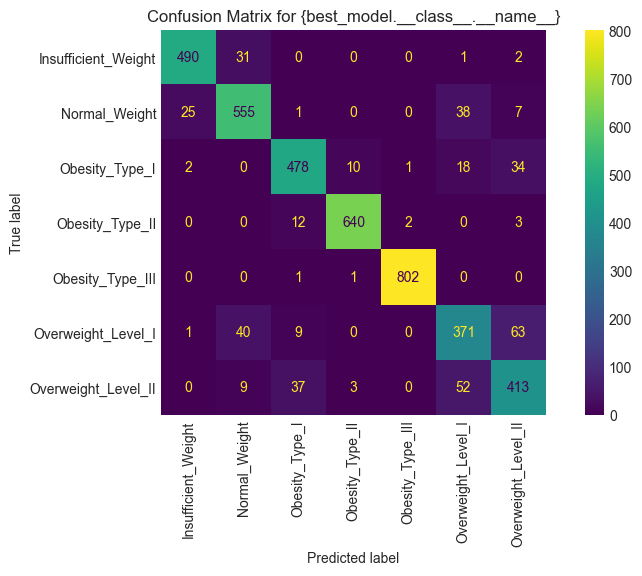

In [44]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score

# Define the parameter search space
param_dist = {
    'max_depth': range(3, 10),  # Range of maximum tree depth
    'learning_rate': [0.01, 0.1, 0.3],  # Different learning rates
    'n_estimators': range(50, 200, 50),  # Number of trees to explore
    'subsample': [0.5, 0.7, 0.9],  # Subsampling ratio for rows
    'colsample_bytree': [0.5, 0.7, 0.9],  # Subsampling ratio for columns
    'gamma': [0, 0.1, 0.3],  # Minimum loss reduction for splitting
}

# Define the scoring metric
scorer = make_scorer(accuracy_score)

# Create the XGBoost classifier with initial parameters
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=3)

# Perform randomized search for hyperparameter tuning
random_search = RandomizedSearchCV(xgb_clf, param_distributions=param_dist,
                                   scoring=scorer, n_iter=50, cv=5, verbose=1)
random_search.fit(X_train, y_train)

# Get the best model with tuned hyperparameters
best_model = random_search.best_estimator_

# Make predictions on the testing data
xgb_y_pred = best_model.predict(X_test)

# Display evaluation (your existing make_evaluation function can be used here)
make_evaluation(y_test, xgb_y_pred, title="Confusion Matrix for {best_model.__class__.__name__}")


In [45]:
xgb_y_pred = best_model.predict(X_test)
xgb_y_pred 
# Print various performance metrics
print("Accuracy:", accuracy_score(y_test, xgb_y_pred))
print("Precision (average):", precision_score(y_test, xgb_y_pred, average='weighted'))
print("Recall (average):", recall_score(y_test, xgb_y_pred, average='weighted'))
print("F1-score (average):", f1_score(y_test, xgb_y_pred, average='weighted'))

# Print classification report for detailed class-wise metrics
print("\nClassification Report:")
print(classification_report(y_test, xgb_y_pred))

Accuracy: 0.9029383429672447
Precision (average): 0.9031680116572963
Recall (average): 0.9029383429672447
F1-score (average): 0.9030316920855661

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       524
           1       0.87      0.89      0.88       626
           2       0.89      0.88      0.88       543
           3       0.98      0.97      0.98       657
           4       1.00      1.00      1.00       804
           5       0.77      0.77      0.77       484
           6       0.79      0.80      0.80       514

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152



In [43]:
pip install Xgboost


  Obtaining dependency information for Xgboost from https://files.pythonhosted.org/packages/03/e6/4aef6799badc2693548559bad5b56d56cfe89eada337c815fdfe92175250/xgboost-2.0.3-py3-none-macosx_12_0_arm64.whl.metadata
  Using cached xgboost-2.0.3-py3-none-macosx_12_0_arm64.whl.metadata (2.0 kB)
Using cached xgboost-2.0.3-py3-none-macosx_12_0_arm64.whl (1.9 MB)

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.12 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [47]:
import pickle

with open('Xgboost.pkl', 'wb') as file:
    pickle.dump(best_model,file)

In [48]:
import pickle

with open('RandomForest.pkl', 'wb') as file:
    pickle.dump(rf_clf,file)

In [119]:
# Load the trained model from the pickle file
with open('Xgboost.pkl', 'rb') as f:
    model = pickle.load(f)

# Use the loaded model to make predictions
predictions = model.predict(X_test)

array([4, 5, 2, ..., 2, 5, 6], dtype=int32)

In [120]:
best_model.predict(X_test)

array([4, 5, 2, ..., 2, 5, 6], dtype=int32)

In [ ]:
print("Accuracy:", accuracy_score(y_test, xgb_y_pred))
print("Precision (average):", precision_score(y_test, xgb_y_pred, average='weighted'))
print("Recall (average):", recall_score(y_test, xgb_y_pred, average='weighted'))
print("F1-score (average):", f1_score(y_test, xgb_y_pred, average='weighted'))

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the training and testing datasets
train_data = pd.read_csv("train.csv")  # Change "train.csv" to the filename of your training dataset
test_data = pd.read_csv("test.csv")    # Change "test.csv" to the filename of your testing dataset

# Assuming the target variable is 'BMI' in both datasets
X_train = train_data[['Age', 'Height', 'Weight', 'NObeyesdad']]
y_train = train_data['BMI']

X_test = test_data[['Age', 'Height', 'Weight', 'NObeyesdad']]
y_test = test_data['BMI']

# Creating a linear SVM model
model = SVC(kernel='linear')

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
